In [23]:
import numpy as np
import scipy.signal as sig
import librosa
import matplotlib.pyplot as plt

In [26]:
range(1)
[i for i in range(1)]

[0]

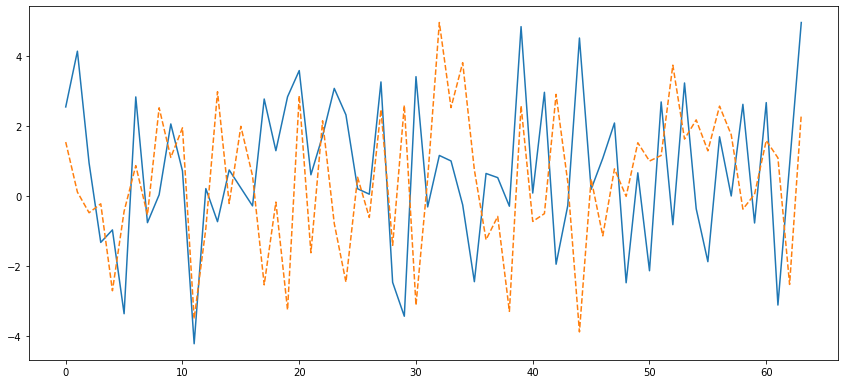

In [29]:
SEED = 12345
rng = np.random.default_rng(SEED)

n = 2**6
y = 2 * rng.random(n) - 1

w = 2 * rng.random(n) - 1

import scipy
nfft = scipy.fft.next_fast_len(n + n - 1)
# nfft = scipy.fft.next_fast_len(n + n - 1)

w_hat = np.fft.rfft(w, nfft, axis=0)

# Manually fft-convolving
y_hat = np.fft.rfft(y, nfft, axis=0)
z_hat = y_hat * w_hat
y_back = np.fft.irfft(z_hat, nfft, axis=0)
y_back1 = np.real_if_close(y_back)

# with scipy
y_back2 = sig.fftconvolve(w, y, mode='same')

# plot
fig, axes = plt.subplots(1,1)
fig.set_size_inches(14.5, 6.5)
axes.plot(y_back1, label='My way')
axes.plot(y_back2, '--', label='SciPy')